# Image Processing Notebook

In [9]:
import sys
sys.path.append('../')

from MRIsegm.utils import get_slice, get_rois, explore_slice, explore_roi, make_mask, mask_slice, display_image, display_images
from MRIsegm.processing import otsu_thresholding, add_images, show_image_histogram, denoise_nlm, compare_denoised_histo, denoise_slice, apply_mask



## Loading data

In [10]:
src = '/Users/giuseppefilitto/Pazienti_anonym_sorted/'
patient = 'BO11/'
dir_path =  src + patient + 'T2AX'

slice = get_slice(dir_path=dir_path) 

print(f"number of layers = {slice.shape[0]}")
roi_path = src + patient + 'T2ROI'

rois = get_rois(roi_path=roi_path) 
positions = [rois[i].get('position') - 1 for i in range(len(rois))]

# set(positions) to have unique values
print(f"number of masks = {len(set(positions))}")

number of layers = 30
number of masks = 17


## Image histogram

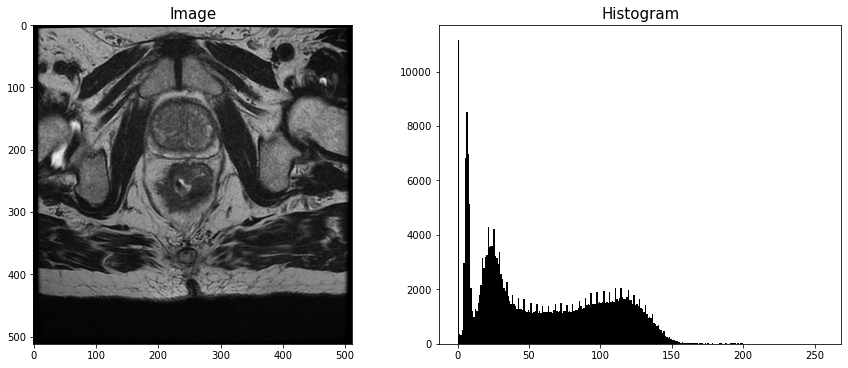

In [11]:
layer = 14
img = slice[layer,: ,:]

show_image_histogram(img)


## Denoising

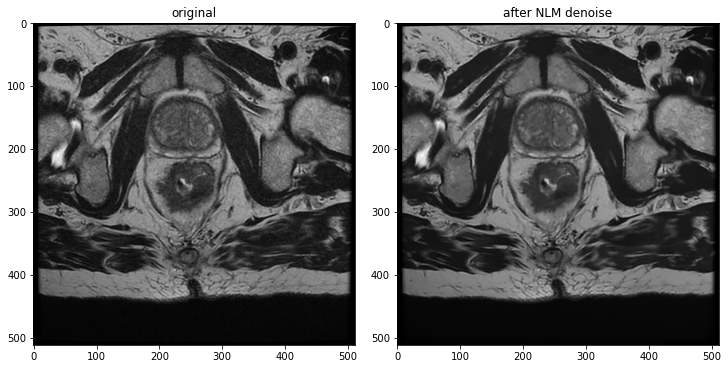

In [12]:
alpha = 5
img = slice[layer,: ,:]

denoise_nlm(img, alpha=alpha, show=True, figsize=(10,5))

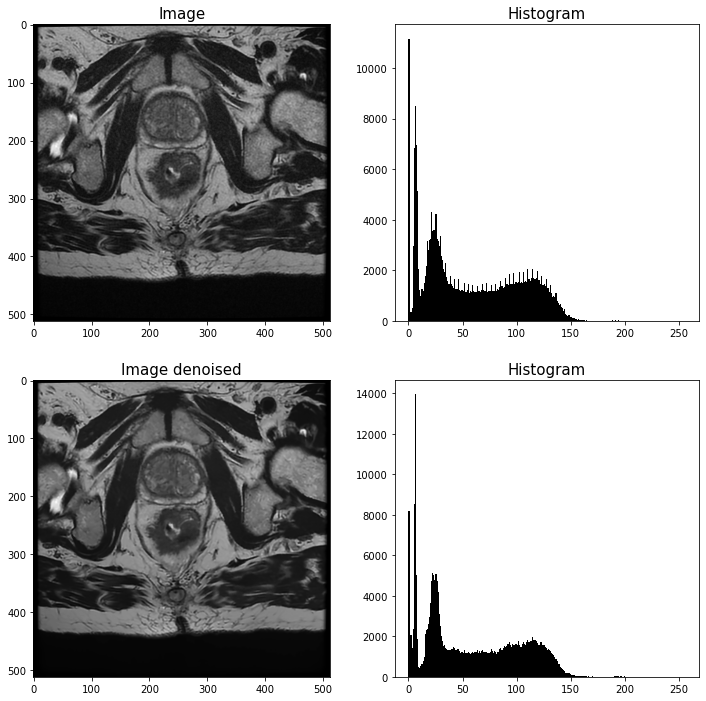

In [13]:
compare_denoised_histo(img, alpha, figsize=(12, 12))

## Otsu thresholding

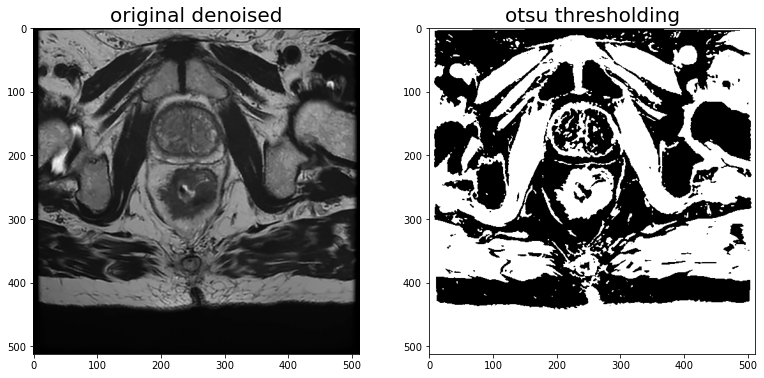

In [14]:
denoised_img = denoise_nlm(img, alpha=alpha)
otsu = otsu_thresholding(denoised_img)

display_images([denoised_img, otsu], figsize=(13,6), titles=['original denoised','otsu thresholding'], fontsize=20)


## Appling threshold to remove features

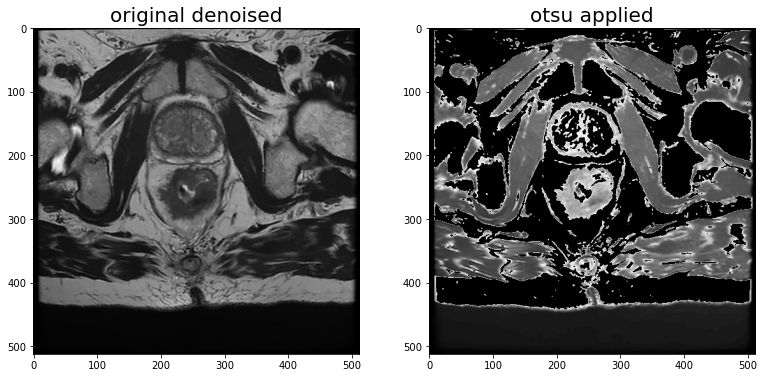

In [15]:
reduced_img = apply_mask(denoised_img, otsu)

display_images([denoised_img, reduced_img], figsize=(13,6), titles=['original denoised','otsu applied'], fontsize=20)